In [1]:
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
import pysm3
import pysm3.units as u
from fgbuster import get_instrument, get_sky, get_observation, get_noise_realization
from fgbuster.visualization import corner_norm
from fgbuster import (CMB, Dust, Synchrotron, basic_comp_sep, xForecast)
from original_tools import delta_r_estimator, Cl2Dl

In [2]:
NSIDE = 128
npix = hp.nside2npix(NSIDE)
instrument = get_instrument('IMo-v1.1')
sky = get_sky(NSIDE, 'c1d0s0')
instrument

/home/cmb/yusuket/.conda/envs/hpenv/lib/python3.8/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/camb_lenspotentialCls.dat (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/cmb/yusuket/.conda/envs/hpenv/lib/python3.8/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/delens_ells.txt (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/cmb/yusuket/.conda/envs/hpenv/lib/python3.8/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_t_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/cmb/yusuket/.conda/envs/hpenv/lib/python3.8/site-packages/pysm3/utils/data.py:42: UserWarning: Retrieve data for pysm_2/dust_q_new.fits (if not cached already)
  warnings.warn(f"Retrieve data for {filename} (if not cached already)")
/home/cmb/yusuket/.conda/envs/hpen

,frequency,depth_p,depth_i,fwhm,bandwidth,pixel_size,detectors,net_det,net_arr_i,net_arr_p,f_sky,status,reference,type,note,experiment
0,40.0,37.42,26.46,70.5,0.30,32.0,48.0,114.63,18.50,26.16,1.0,forecast,https://wiki.kek.jp/display/cmb/IMo-V1.1+-+Jan...,satellite,Warning: depth_i is not the official one but s...,IMo-v1.1
1,50.0,33.46,23.66,58.5,0.30,32.0,24.0,72.48,16.54,23.39,1.0,forecast,https://wiki.kek.jp/display/cmb/IMo-V1.1+-+Jan...,satellite,Warning: depth_i is not the official one but s...,IMo-v1.1
2,60.0,21.31,15.07,51.1,0.23,32.0,48.0,65.28,10.54,14.91,1.0,forecast,https://wiki.kek.jp/display/cmb/IMo-V1.1+-+Jan...,satellite,Warning: depth_i is not the official one but s...,IMo-v1.1
3,68.0,16.87,11.93,44.4,0.23,24.0,168.0,57.66,8.34,11.79,1.0,forecast,https://wiki.kek.jp/display/cmb/IMo-V1.1+-+Jan...,satellite,Warning: depth_i is not the official one but s...,IMo-v1.1
4,78.0,12.07,8.53,40.4,0.23,24.0,192.0,47.82,5.97,8.44,1.0,forecast,https://wiki.kek.jp/display/cmb/IMo-V1.1+-+Jan...,satellite,Warning: depth_i is not the official one but s...,IMo-v1.1
5,89.0,11.30,7.99,37.3,0.23,24.0,168.0,45.05,5.58,7.89,1.0,forecast,https://wiki.kek.jp/display/cmb/IMo-V1.1+-+Jan...,satellite,Warning: depth_i is not the official one but s...,IMo-v1.1
6,100.0,6.56,4.64,34.0,0.23,13.8,510.0,43.58,3.24,4.58,1.0,forecast,https://wiki.kek.jp/display/cmb/IMo-V1.1+-+Jan...,satellite,Warning: depth_i is not the official one but s...,IMo-v1.1
7,119.0,4.58,3.24,30.0,0.30,13.8,632.0,40.78,2.26,3.20,1.0,forecast,https://wiki.kek.jp/display/cmb/IMo-V1.1+-+Jan...,satellite,Warning: depth_i is not the official one but s...,IMo-v1.1
8,140.0,4.79,3.39,27.3,0.30,13.8,510.0,31.32,2.37,3.35,1.0,forecast,https://wiki.kek.jp/display/cmb/IMo-V1.1+-+Jan...,satellite,Warning: depth_i is not the official one but s...,IMo-v1.1
9,166.0,5.57,3.94,28.9,0.30,11.6,488.0,64.37,2.75,3.89,1.0,forecast,https://wiki.kek.jp/display/cmb/IMo-V1.1+-+Jan...,satellite,Warning: depth_i is not the official one but s...,IMo-v1.1


`freq_maps` is the set of maps for which we want to perform component separation.

In [3]:
freq_maps = get_observation(instrument, sky)
print("(band, n_stokes, Npix) =", freq_maps.shape)

(band, n_stokes, Npix) = (15, 3, 196608)


In [4]:
components = [CMB(), Dust(353.), Synchrotron(23.)] # I'm not sure 353., 23., It just written in FGBuster's tutorial.
components[1].defaults = [1.6, 22.] # It's also.
components[2].defaults = [-2.7]

In [5]:
result = basic_comp_sep(components, instrument, freq_maps)

In [6]:
print(result.params)
print(result.x)

['Dust.beta_d', 'Dust.temp', 'Synchrotron.beta_pl']
[ 1.5399992  20.00002372 -2.99998117]


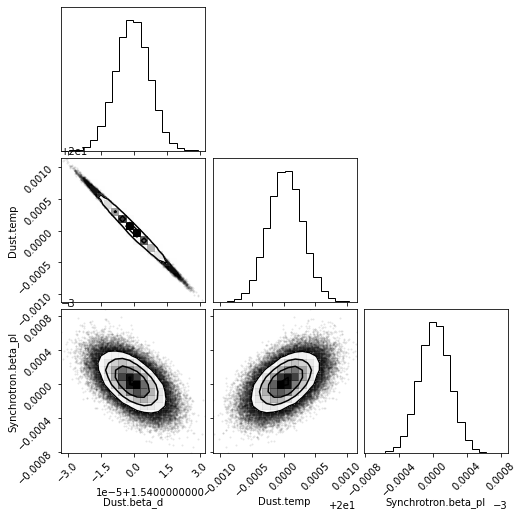

In [7]:
corner_norm(result.x, result.Sigma, labels=result.params)

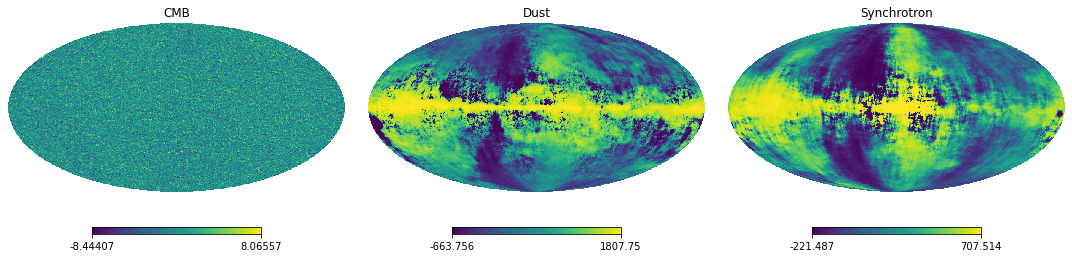

In [8]:
plt.figure(figsize=(15,10))
hp.mollview(result.s[0,1], title='CMB', sub=(1,3,1))
hp.mollview(result.s[1,1], title='Dust', norm='hist', sub=(1,3,2))
hp.mollview(result.s[2,1], title='Synchrotron', norm='hist', sub=(1,3,3))

In [9]:
input_cmb = sky.components[0].map.value
result_cmb = np.array([result.s[0,0], result.s[0,1], result.s[0,2]])

In [10]:
res_cmb = input_cmb - result_cmb

inputcl = hp.anafast(input_cmb)
rescl_cmb = hp.anafast(res_cmb)

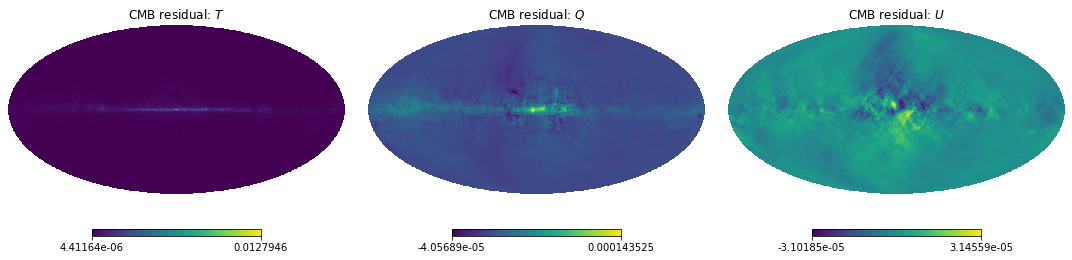

In [11]:
plt.figure(figsize=(15,10))
hp.mollview(res_cmb[0], sub=(1,3,1), norm="none", title="CMB residual: $T$")
hp.mollview(res_cmb[1], sub=(1,3,2), norm="none", title="CMB residual: $Q$")
hp.mollview(res_cmb[2], sub=(1,3,3), norm="none", title="CMB residual: $U$")

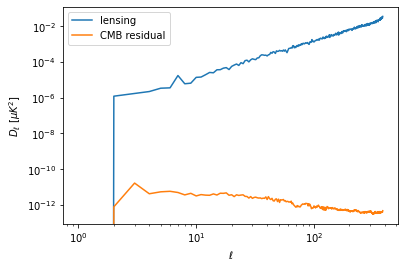

In [15]:
plt.loglog(Cl2Dl(inputcl[2,:]), label="lensing")
plt.loglog(Cl2Dl(rescl_cmb[2,:]), label="CMB residual")
plt.ylabel("$D_\ell ~ [\mu K^2]$")
plt.xlabel("$\ell$")
plt.legend()

delta_r:  1e-09


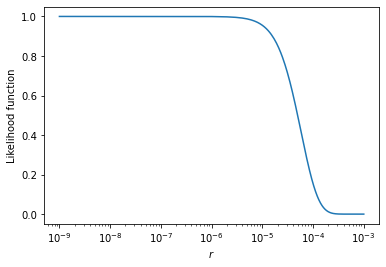

In [16]:
r = np.linspace(1e-9, 1e-3, 1000)
lmax = 3*NSIDE - 1
dr, L = delta_r_estimator(r, lmax, rescl_cmb[2,:])#rescl[2,:])
plt.plot(r, L)
plt.xscale("log")
plt.xlabel("$r$")
plt.ylabel("Likelihood function")
print("delta_r: ", dr)